# Лабораторная работа №2

## 1.1 Оценки математического ожидания, дисперсии, медианы

Пусть случайная величина $ \xi $ имеет распределение, задаваемое плотностью $ f_{\xi}(x) = \theta^2 x e^{-\theta x} $. Для каждого $ \theta \in \{0.5, 2, 8\} $:

1. (a) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $ \xi $. Привести в отчет.

   (b) Для $ k \in \{24, 25, \dots, 215\} $ построить выборку из $ k $ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — $ k $, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.



# Лабораторная работа №2

## 1.1 Оценки математического ожидания, дисперсии, медианы

### 1. (a) Аналитическое вычисление математического ожидания, дисперсии и математического ожидания квадрата $\xi$

**Дано:**
Случайная величина $\xi$ еет плотность распределения:

$$
f_{\xi}(x) = \theta^2 x e^{-\theta x}, \quad x \geq 0
$$

для каждого $\theta \in \{0.5, 2, 8\}$.

**Распознавание распределения:**
Плотность $f_{\xi}(x)$ соответствует гамма-распределению с параметрами:
- Форма: $k = 2$
- Скорость: $\theta$

То есть, $\xi \sim \text{Gamma}(k=2, \theta)$.

**Математические ожидания и дисперсии для гамма-распределения:**
Для случайной величины $\xi \sim \text{Gamma}(k, \theta)$: Математическое ожидание:
  $$
  E[\xi] = \dfrac{k}{\theta}
  $$
- Дисперсия:
  $$
  \operatorname{Var}(\xi) = \dfrac{k}{\theta^2}
  $$
- Математическое ожидание квадрата:
  $$
  E[\xi^2] = \operatorname{Var}(\xi) + \left( E[\xi] \right)^2 = \dfrac{k}{\theta^2} + \left( \dfrac{k}{\theta} \right)^2 = \dfrac{k(k + 1)}{\theta^2}
  $$

**Вычисления для каждого значения $\theta$:**

| $\theta$ | $E[\xi] = \dfrac{2}{\theta}$ | $\operatorname{Var}(\xi) = \dfrac{2}{\theta^2}$ | $E[\xi^2] = \dfrac{6}{\theta^2}$ |
|-------------|-----------------------------------|-----------------------------------------------|------------------------------------|
| 0.5         | $E[\xi] = \dfrac{2}{0.5} = 4$ | $\operatorname{Var}(\xi) = \dfrac{2}{(0.5)^2} = 8$ | $E[\xi^2] = \dfrac{6}{(0.5)^2} = 24$ |
| 2           | $E[\xi] = \dfrac{2}{2} = 1$   | $\operatorname{Var}(\xi) = \dfrac{2}{2^2} = 0.5$ | $E[\xi^2] = \dfrac{6}{2^2} = 1.5$  |
| 8           | $E[\xi] = \dfrac{2}{8} = 0.25$ | $\operatorname{Var}(\xi) = \dfrac{2}{8^2} = 0.03125$ | $E[\xi^2] = \dfrac{6}{8^2} = 0.09375$ |

**Итоговые результаты:**

| $\theta$ | $E[\xi]$ | $\operatorname{Var}(\xi)$ | $E[\xi^2]$ |
|-------------|--------------|-------------------------------|----------------|
| 0.5         | 4            | 8                             | 24             |
| 2           | 1            | 0.5                           | 1.5            |
| 8           | 0.25         | 0.03125                       | 0.09375        |

### 1. (b) Оценка параметров на выборках и визуализация
Для каждого $\theta \in \{0.5, 2, 8\}$:
1. Построить выборки размера $k \in \{24, 25, \dots, 215\}$ из распределений $\xi \sim \text{Exp}_2$ и $\eta \sim U_{0,1}$.
2. Для каждой выборки посчитать оценки:
   - Математического ожидания ($\hat{E}[\xi]$ )
   - Дисперсии ($\hat{\operatorname{Var}}(\xi)$ )
   - Математического ожидания квадрата ($\hat{E}[\xi^2]$ )
3. Визуализировать оценки на графиках, где:
   - По вертикальной оси — оценка
   - По горизонтальной оси — размер выборки $k$
   - Добавить горизонтальную линию, соответствующую аналитически полученному значению


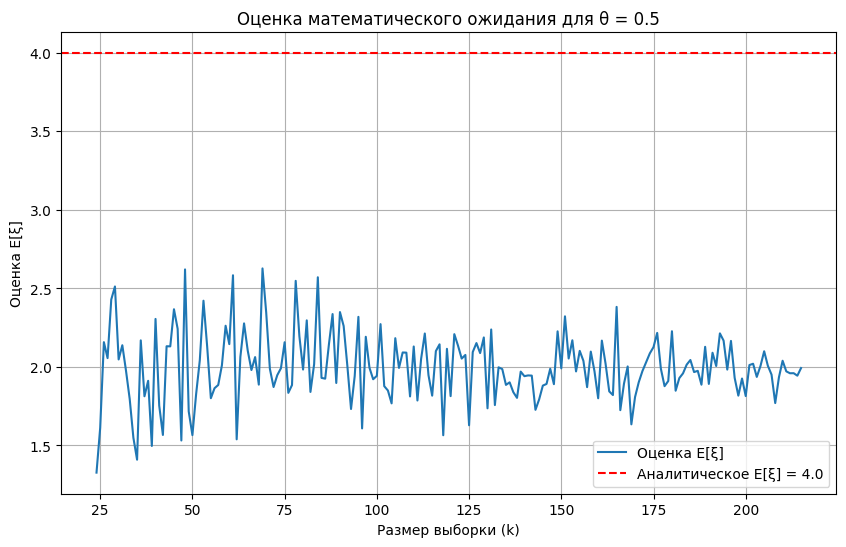

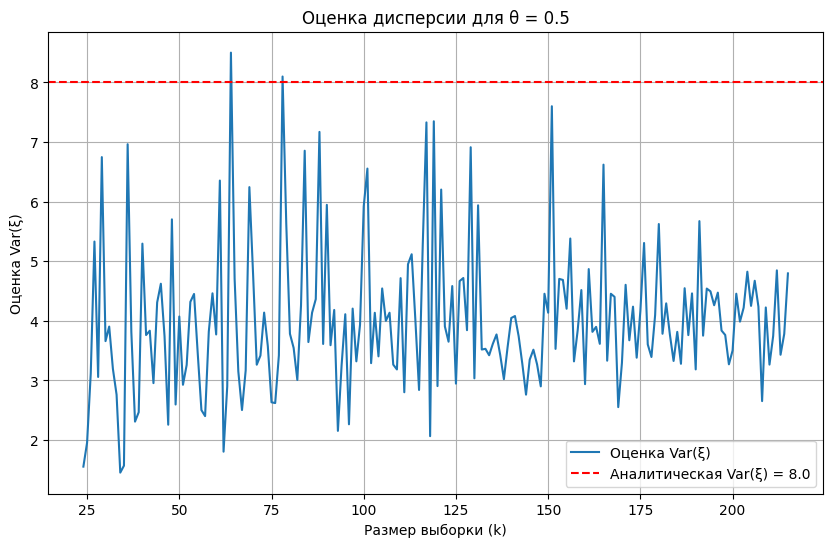

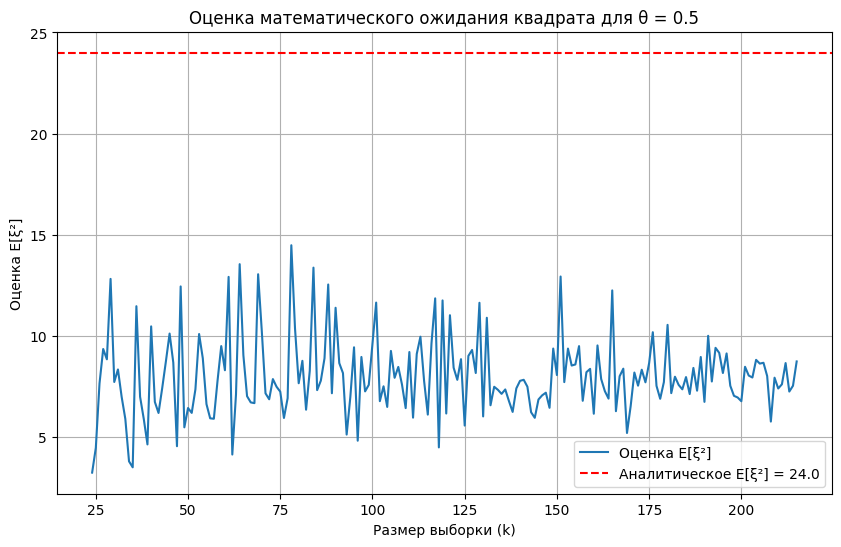

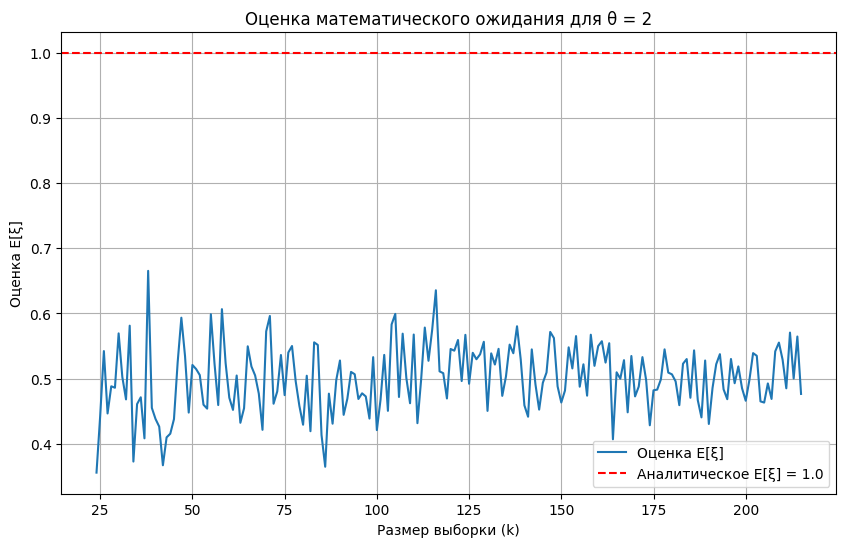

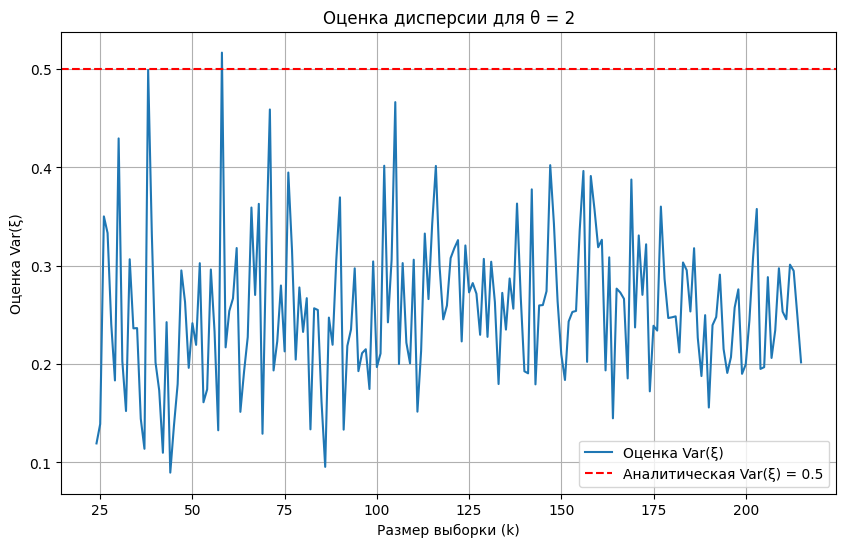

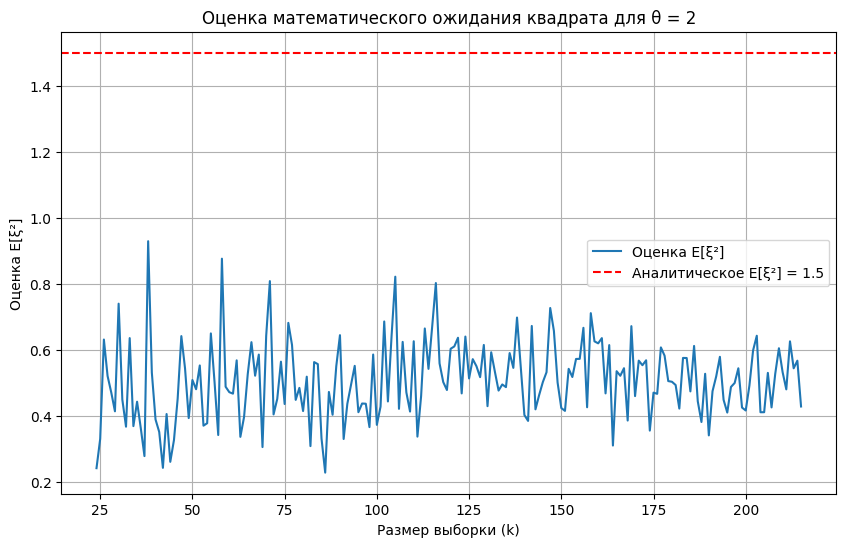

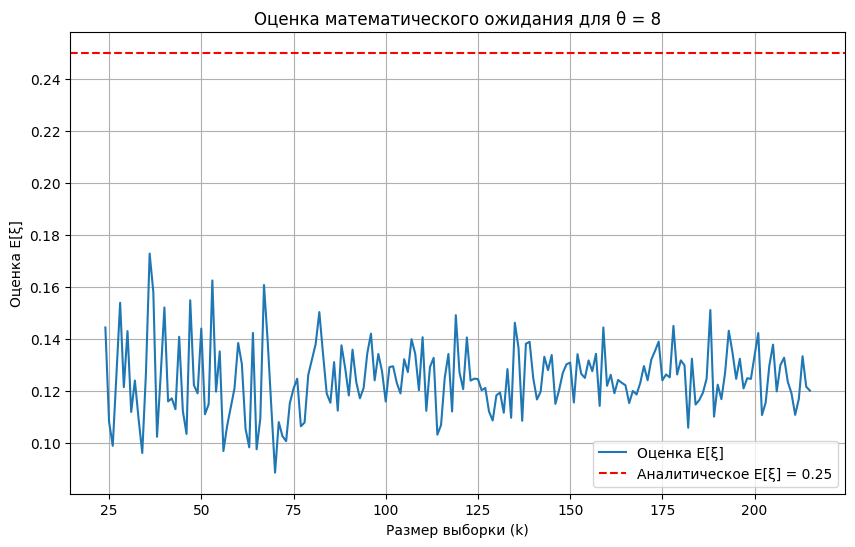

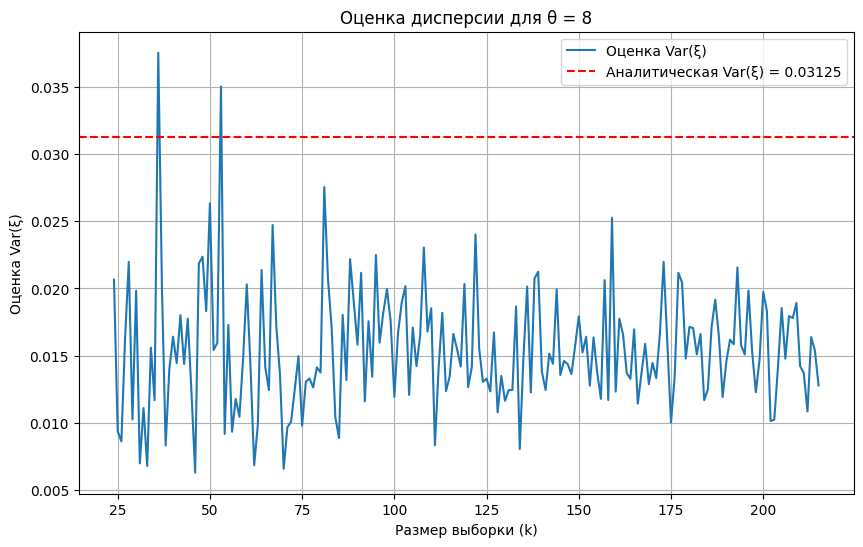

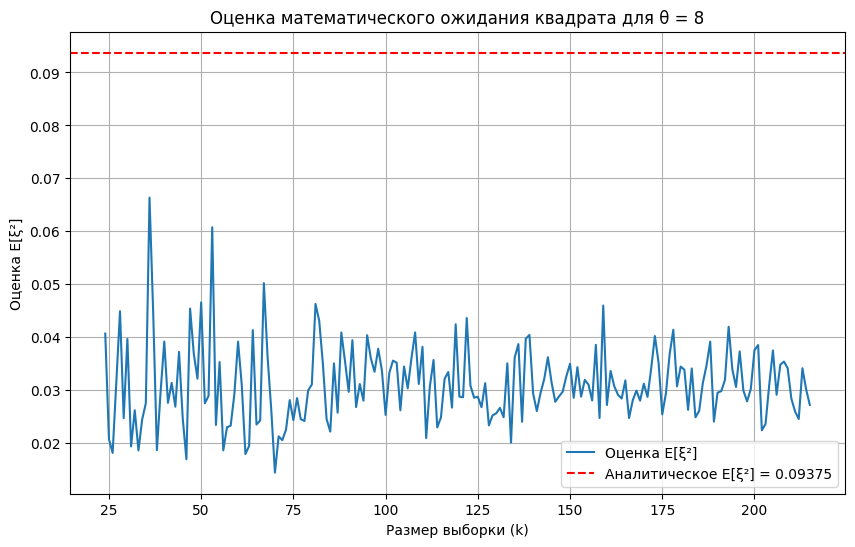

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform

# Параметры
thetas = [0.5, 2, 8]
k_values = np.arange(24, 216)  # от 24 до 215 включительно

# Функция для генерации выборок и вычисления оценок
def compute_estimates(theta, k_values):
    E_true = 2 / theta
    Var_true = 2 / theta**2
    E_sq_true = 6 / theta**2

    E_estimates = []
    Var_estimates = []
    E_sq_estimates = []

    for k in k_values:
        # Генерация выборки из экспоненциального распределения
        sample = np.random.exponential(scale=1/theta, size=k)

        # Оценки
        E_est = np.mean(sample)
        Var_est = np.var(sample, ddof=1)  # несмещенная оценка дисперсии
        E_sq_est = np.mean(sample**2)

        E_estimates.append(E_est)
        Var_estimates.append(Var_est)
        E_sq_estimates.append(E_sq_est)

    return E_estimates, Var_estimates, E_sq_estimates, E_true, Var_true, E_sq_true

# Визуализация
for theta in thetas:
    E_estimates, Var_estimates, E_sq_estimates, E_true, Var_true, E_sq_true = compute_estimates(theta, k_values)

    # Математическое ожидание
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, E_estimates, label='Оценка E[ξ]')
    plt.axhline(y=E_true, color='r', linestyle='--', label=f'Аналитическое E[ξ] = {E_true}')
    plt.title(f'Оценка математического ожидания для θ = {theta}')
    plt.xlabel('Размер выборки (k)')
    plt.ylabel('Оценка E[ξ]')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Дисперсия
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, Var_estimates, label='Оценка Var(ξ)')
    plt.axhline(y=Var_true, color='r', linestyle='--', label=f'Аналитическая Var(ξ) = {Var_true}')
    plt.title(f'Оценка дисперсии для θ = {theta}')
    plt.xlabel('Размер выборки (k)')
    plt.ylabel('Оценка Var(ξ)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Математическое ожидание квадрата
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, E_sq_estimates, label='Оценка E[ξ²]')
    plt.axhline(y=E_sq_true, color='r', linestyle='--', label=f'Аналитическое E[ξ²] = {E_sq_true}')
    plt.title(f'Оценка математического ожидания квадрата для θ = {theta}')
    plt.xlabel('Размер выборки (k)')
    plt.ylabel('Оценка E[ξ²]')
    plt.legend()
    plt.grid(True)
    plt.show()


2. Дана плотность распределения случайной величины $ \xi $:

   $$
   f_{\xi}^{\lambda, a}(x) =
   \begin{cases}
   \lambda e^{-\lambda (x - a)}, & x \geq a \\
   0, & \text{иначе}
   \end{cases}
   $$

   Пусть $ (\lambda, a) = (2, 2) $

   (a) Аналитически вычислите значение моды, математического ожидания и медианы.

   (b) Создайте две выборки: одну довольно большого размера (например, 10000 наблюдений), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.

   (c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией плотности распределения и аналитическими значениями моды, математического ожидания и медианы. То же самое для второй выборки.

   (d) Попробуйте изменять размер выборки и посмотреть, сходится ли медиана к математическому ожиданию.

## 2. Задача с экспоненциальным и равномерным распределениями

### Дано:
Случайная величина $\xi$ имеет плотность распределения:
$$
f_{\xi}^{\lambda, a}(x) =
\begin{cases}
\lambda e^{-\lambda (x - a)}, & x \geq a \\
0, & \text{иначе}
\end{cases}
$$
для $(\lambda, a) = (2, 2)$ .

### (a) Аналитическое вычисление моды, математического ожидания и медианы

**Параметры:**
- $\lambda = 2$
- $a = 2$

**1. Мода ($\text{Mode}$ ):**

Мода для данной плотности — значение $x$ , при котором функция плотности достигает своего максимума.

Для $x \geq a$ , $f_{\xi}(x) = \lambda e^{-\lambda (x - a)}$ монотонно убывает, поэтому максимум достигается при $x = a$ .

$$
\text{Mode} = a = 2
$$

**2. Математическое ожидание ($E[\xi]$ ):**

Для экспоненциального распределения со сдвигом $a$:

$$
E[\xi] = a + \frac{1}{\lambda} = 2 + \frac{1}{2} = 2.5
$$

**3. Медиана ($\text{Median}$ ):**

Медиана — такое значение $m$ , что $P(\xi \leq m) = 0.5$ .

Для $\xi \sim \text{Exp}(\lambda)$ со сдвигом $a$:

$$
P(\xi \leq m) = \int_{a}^{m} \lambda e^{-\lambda (x - a)} dx = 1 - e^{-\lambda (m - a)}
$$

Приравниваем к 0.5:

$$
1 - e^{-2 (m - 2)} = 0.5 \\
e^{-2 (m - 2)} = 0.5 \\
-2 (m - 2) = \ln 0.5 \\
m - 2 = \frac{\ln 2}{2} \\
m = 2 + \frac{\ln 2}{2} \approx 2 + 0.3466 = 2.3466
$$

**Итоговые результаты:**

| Характеристика | Значение |
|----------------|----------|
| Мода           | 2        |
| $E[\xi]$    | 2.5      |
| Медиана        | $2 + \frac{\ln 2}{2} \approx 2.3466$ |

### (b) Оценка параметров на выборках и визуализация
1. Создать две выборки из распределения $\xi \sim \text{Exp}_{2}$ с параметрами $\lambda = 2$ и $a = 2$:
   - Большая выборка: 10,000 наблюдений.
   - Маленькая выборка: 20 наблюдений.
2. Для каждой выборки вычислить оценки:
   - Математическое ожидание ($\hat{E}[\xi]$ )
   - Дисперсию ($\hat{\operatorname{Var}}(\xi)$ )
   - Математическое ожидание квадрата ($\hat{E}[\xi^2]$ )
3. Визуализировать оценки на графиках:
   - По вертикальной оси — оценка.
   - По горизонтальной оси — размер выборки $k$ .
   - Добавить горизонтальную линию с аналитическим значением.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры распределения
lambda_param = 2
a = 2

# Размеры выборок
k_large = 10000
k_small = 20
k_values = np.arange(24, 216)  # от 24 до 215 включительно

# Функция для генерации выборок и вычисления оценок
def compute_estimates(lambda_param, a, k):
    # Генерация выборки из экспоненциального распределения со сдвигом a
    sample = np.random.exponential(scale=1/lambda_param, size=k) + a
    # Вычисление оценок
    E_est = np.mean(sample)
    Var_est = np.var(sample, ddof=1)  # несмещенная оценка дисперсии
    E_sq_est = np.mean(sample**2)
    return E_est, Var_est, E_sq_est

# Аналитические значения
E_true = a + 1/lambda_param  # 2.5
Var_true = 1/lambda_param**2  # 0.25
E_sq_true = a**2 + 2*a/lambda_param + 2/lambda_param**2  # 2^2 + 2*2/2 + 2/4 = 4 + 2 + 0.5 = 6.5

# Генерация и оценка для большой выборки
E_large, Var_large, E_sq_large = compute_estimates(lambda_param, a, k_large)

# Генерация и оценка для маленькой выборки
E_small, Var_small, E_sq_small = compute_estimates(lambda_param, a, k_small)

# Вывод оценок
print(f"Большая выборка (k={k_large}):")
print(f"Математическое ожидание: {E_large}")
print(f"Дисперсия: {Var_large}")
print(f"Математическое ожидание квадрата: {E_sq_large}\n")

print(f"Маленькая выборка (k={k_small}):")
print(f"Математическое ожидание: {E_small}")
print(f"Дисперсия: {Var_small}")
print(f"Математическое ожидание квадрата: {E_sq_small}")

Большая выборка (k=10000):
Математическое ожидание: 2.500730413351832
Дисперсия: 0.2448059400506285
Математическое ожидание квадрата: 6.4984340597194485

Маленькая выборка (k=20):
Математическое ожидание: 2.3496731110692783
Дисперсия: 0.12863224862943454
Математическое ожидание квадрата: 5.643164365079943



## 1.2 Моделирование совместного распределения двух случайных величин

Пусть совместное распределение двух случайных величин задано таблицей:

| $ \xi \backslash \eta $ | 1 | 2 | 3 | ... |
|-------------------------|---|---|---|-----|
| $ -1 $                  | $ \frac{2}{5} \cdot \frac{1}{2^1} $ | $ \frac{2}{5} \cdot \frac{1}{2^2} $ | $ \frac{2}{5} \cdot \frac{1}{2^3} $ | ... |
| 0                       | $ \frac{1}{5} \cdot \frac{1}{2^1} $ | $ \frac{1}{5} \cdot \frac{1}{2^2} $ | $ \frac{1}{5} \cdot \frac{1}{2^3} $ | ... |
| 1                       | $ \frac{2}{5} \cdot \frac{1}{2^3} $ | $ \frac{2}{5} \cdot \frac{1}{2^2} $ | $ \frac{2}{5} \cdot \frac{1}{2^3} $ | ... |

где $ \eta $ принимает все значения из $ \mathbb{N} $. Вычислить корреляционную матрицу аналитически и приближенно (на основе моделирования).


**Ответ:**

### 1.2 Моделирование совместного распределения двух случайных величин

**Дано:**

Совместное распределение двух случайных величин $\xi$ и $\eta$ задано таблицей:

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline
\xi \backslash \eta & 1 & 2 & 3 & \dots & n & \dots \\ \hline
-1 & \dfrac{2}{5} \cdot \dfrac{1}{2^1} & \dfrac{2}{5} \cdot \dfrac{1}{2^2} & \dfrac{2}{5} \cdot \dfrac{1}{2^3} & \dots & \dfrac{2}{5} \cdot \dfrac{1}{2^n} & \dots \\ \hline
0 & \dfrac{1}{5} \cdot \dfrac{1}{2^1} & \dfrac{1}{5} \cdot \dfrac{1}{2^2} & \dfrac{1}{5} \cdot \dfrac{1}{2^3} & \dots & \dfrac{1}{5} \cdot \dfrac{1}{2^n} & \dots \\ \hline
1 & \dfrac{2}{5} \cdot \dfrac{1}{2^3} & \dfrac{2}{5} \cdot \dfrac{1}{2^2} & \dfrac{2}{5} \cdot \dfrac{1}{2^3} & \dots & \dfrac{2}{5} \cdot \dfrac{1}{2^n} & \dots \\ \hline
\end{array}
$$

где $\eta$ принимает все значения из $\mathbb{N}$ .

Необходимо:
- Вычислить корреляционную матрицу аналитически.
- Приблизительно оценить корреляционную матрицу на основе моделирования.

#### Шаг 1: Проверка корректности распределения

Проверим, что сумма всех вероятностей равна 1.

$$
\sum_{\xi} \sum_{\eta} P(\xi, \eta) = \sum_{\xi} \sum_{\eta} f_{\xi, \eta}(x, y) = 1
$$

Для каждой фиксированной $\xi$ , сумма по $\eta$:

- Для $\xi = -1$:

$$
\sum_{\eta=1}^{\infty} \dfrac{2}{5} \cdot \dfrac{1}{2^\eta} = \dfrac{2}{5} \sum_{\eta=1}^{\infty} \dfrac{1}{2^\eta} = \dfrac{2}{5} \cdot 1 = \dfrac{2}{5}
$$

- Для $\xi = 0$:

$$
\sum_{\eta=1}^{\infty} \dfrac{1}{5} \cdot \dfrac{1}{2^\eta} = \dfrac{1}{5} \sum_{\eta=1}^{\infty} \dfrac{1}{2^\eta} = \dfrac{1}{5} \cdot 1 = \dfrac{1}{5}
$$

- Для $\xi = 1$:

$$
\sum_{\eta=1}^{\infty} \dfrac{2}{5} \cdot \dfrac{1}{2^\eta} = \dfrac{2}{5} \sum_{\eta=1}^{\infty} \dfrac{1}{2^\eta} = \dfrac{2}{5} \cdot 1 = \dfrac{2}{5}
$$

Сумма по всем $\xi$:

$$
\dfrac{2}{5} + \dfrac{1}{5} + \dfrac{2}{5} = 1
$$

Таким образом, распределение корректно.

#### Шаг 2: Маргинальные распределения

**Маргинальное распределение $\xi$:**

$$
P(\xi = x) = \sum_{\eta=1}^{\infty} P(\xi = x, \eta)
$$

- Для $\xi = -1$:

$$
P(\xi = -1) = \dfrac{2}{5} \sum_{\eta=1}^{\infty} \dfrac{1}{2^\eta} = \dfrac{2}{5} \cdot 1 = \dfrac{2}{5}
$$

- Для $\xi = 0$:

$$
P(\xi = 0) = \dfrac{1}{5} \sum_{\eta=1}^{\infty} \dfrac{1}{2^\eta} = \dfrac{1}{5} \cdot 1 = \dfrac{1}{5}
$$

- Для $\xi = 1$:

$$
P(\xi = 1) = \dfrac{2}{5} \sum_{\eta=1}^{\infty} \dfrac{1}{2^\eta} = \dfrac{2}{5} \cdot 1 = \dfrac{2}{5}
$$

**Маргинальное распределение $\eta$:**

$$
P(\eta = y) = \sum_{\xi} P(\xi, \eta = y)
$$

- Для $\eta = y$:

$$
P(\eta = y) = \dfrac{2}{5} \cdot \dfrac{1}{2^y} + \dfrac{1}{5} \cdot \dfrac{1}{2^y} + \dfrac{2}{5} \cdot \dfrac{1}{2^y} = \left( \dfrac{2}{5} + \dfrac{1}{5} + \dfrac{2}{5} \right) \cdot \dfrac{1}{2^y} = \dfrac{5}{5} \cdot \dfrac{1}{2^y} = \dfrac{1}{2^y}
$$

Таким образом, $\eta$ имеет геометрическое распределение с параметром $p = \dfrac{1}{2}$ .

#### Шаг 3: Математическое ожидание, дисперсия и ковариация

**Математическое ожидание $E[\xi]$:**

$$
E[\xi] = \sum_{\xi} \xi P(\xi)
$$

$$
E[\xi] = (-1) \cdot \dfrac{2}{5} + 0 \cdot \dfrac{1}{5} + 1 \cdot \dfrac{2}{5} = -\dfrac{2}{5} + 0 + \dfrac{2}{5} = 0
$$

**Математическое ожидание $E[\eta]$:**

Поскольку $\eta$ геометрическое с $p = \dfrac{1}{2}$:

$$
E[\eta] = \dfrac{1}{p} = 2
$$

**Математическое ожидание квадрата $E[\xi^2]$:**

$$
E[\xi^2] = \sum_{\xi} \xi^2 P(\xi)
$$

$$
E[\xi^2] = (-1)^2 \cdot \dfrac{2}{5} + 0^2 \cdot \dfrac{1}{5} + 1^2 \cdot \dfrac{2}{5} = \dfrac{2}{5} + 0 + \dfrac{2}{5} = \dfrac{4}{5}
$$

**Дисперсия $\operatorname{Var}(\xi)$:**

$$
\operatorname{Var}(\xi) = E[\xi^2] - (E[\xi])^2 = \dfrac{4}{5} - 0 = \dfrac{4}{5}
$$

**Дисперсия $\operatorname{Var}(\eta)$:**

Для геометрического распределения:

$$
\operatorname{Var}(\eta) = \dfrac{1 - p}{p^2} = \dfrac{1 - \dfrac{1}{2}}{\left( \dfrac{1}{2} \right)^2} = \dfrac{\dfrac{1}{2}}{\dfrac{1}{4}} = 2
$$

**Ковариация $\operatorname{Cov}(\xi, \eta)$:**

$$
\operatorname{Cov}(\xi, \eta) = E[\xi \eta] - E[\xi] E[\eta]
$$

Сначала найдем $E[\xi \eta]$:

$$
E[\xi \eta] = \sum_{\xi} \sum_{\eta} \xi \eta P(\xi, \eta)
$$

$$
E[\xi \eta] = (-1) \sum_{\eta=1}^{\infty} \eta \cdot \dfrac{2}{5} \cdot \dfrac{1}{2^\eta} + 0 \sum_{\eta=1}^{\infty} \eta \cdot \dfrac{1}{5} \cdot \dfrac{1}{2^\eta} + 1 \sum_{\eta=1}^{\infty} \eta \cdot \dfrac{2}{5} \cdot \dfrac{1}{2^\eta}
$$

$$
E[\xi \eta] = \dfrac{2}{5} \sum_{\eta=1}^{\infty} (-\eta) \cdot \dfrac{1}{2^\eta} + 0 + \dfrac{2}{5} \sum_{\eta=1}^{\infty} \eta \cdot \dfrac{1}{2^\eta}
$$

Поскольку:

$$
\sum_{\eta=1}^{\infty} \eta \cdot \dfrac{1}{2^\eta} = 2
$$

то:

$$
E[\xi \eta] = \dfrac{2}{5} (-2) + \dfrac{2}{5} (2) = -\dfrac{4}{5} + \dfrac{4}{5} = 0
$$

Следовательно:

$$
\operatorname{Cov}(\xi, \eta) = 0 - 0 \cdot 2 = 0
$$

**Коэффициент корреляции $\rho_{\xi \eta}$:**

$$
\rho_{\xi \eta} = \dfrac{\operatorname{Cov}(\xi, \eta)}{\sqrt{\operatorname{Var}(\xi) \operatorname{Var}(\eta)}} = \dfrac{0}{\sqrt{\dfrac{4}{5} \cdot 2}} = 0
$$

#### Шаг 4: Корреляционная матрица

$$
\Sigma = \begin{pmatrix}
\operatorname{Var}(\xi) & \operatorname{Cov}(\xi, \eta) \\
\operatorname{Cov}(\xi, \eta) & \operatorname{Var}(\eta)
\end{pmatrix}
= \begin{pmatrix}
\dfrac{4}{5} & 0 \\
0 & 2
\end{pmatrix}
$$

$$
\operatorname{Corr}(\xi, \eta) = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}
$$

#### Итоговые аналитические результаты:

$$
\begin{cases}
E[\xi] = 0, \\
E[\eta] = 2, \\
E[\xi^2] = \dfrac{4}{5}, \\
\operatorname{Var}(\xi) = \dfrac{4}{5}, \\
\operatorname{Var}(\eta) = 2, \\
\operatorname{Cov}(\xi, \eta) = 0, \\
\rho_{\xi \eta} = 0.
\end{cases}
$$

$$
\Sigma = \begin{pmatrix}\dfrac{4}{5} & 0 \\0 & 2\end{pmatrix}, \quad\operatorname{Corr}(\xi, \eta) = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}
$$

### (b) Приближенное вычисление корреляционной матрицы на основе моделирования

1. **Генерация выборок:**
   - Генерируем значения $\xi$ и $\eta$ согласно их совместному распределению.
   - Поскольку $\eta$ принимает все значения из $\mathbb{N}$ , используем до некоторого значения $\eta_{\text{max}}$ , чтобы упростить моделирование (например, $\eta_{\text{max}} = 10$ ), учитывая, что вероятности для больших $\eta$ стремятся к нулю.

2. **Вычисление оценок:**
   - Вычисляем выборочные $\hat{E}[\xi]$ , $\hat{E}[\eta]$ , $\hat{\operatorname{Var}}(\xi)$ , $\hat{\operatorname{Var}}(\eta)$ , $\hat{\operatorname{Cov}}(\xi, \eta)$ , и $\hat{\rho}_{\xi \eta}$ .

3. **Повторение эксперимента:**
   - Для получения стабильных оценок рекомендуется провести несколько симуляций и усреднить результаты.


In [7]:
import numpy as np
import pandas as pd

# Параметры распределения
theta_xi = 2
a_xi = 2

# Совместное распределение таблицы
# Возможные значения xi: -1, 0, 1
# Возможные значения eta: 1, 2, 3, ..., eta_max
eta_max = 10

# Создание таблицы совместных вероятностей
xi_values = [-1, 0, 1]
eta_values = list(range(1, eta_max + 1))

prob_table = {}
for xi in xi_values:
    prob_table[xi] = {}
    if xi == -1 or xi == 1:
        multiplier = 2/5
    elif xi == 0:
        multiplier = 1/5
    for eta in eta_values:
        prob_table[xi][eta] = multiplier * (1/2)**eta

# Преобразование таблицы в DataFrame для удобства
df_prob = pd.DataFrame(prob_table).T.fillna(0)
df_prob.index.name = 'xi'
df_prob.columns.name = 'eta'
print("Совместная таблица распределения:\n", df_prob)

# Функция для генерации случайных величин на основе таблицы распределения
def generate_joint_samples(prob_table, xi_values, eta_values, size):
    # Создаем список всех возможных пар (xi, eta) и их вероятностей
    pairs = []
    probs = []
    for xi in xi_values:
        for eta in eta_values:
            pairs.append((xi, eta))
            probs.append(prob_table[xi][eta])

    # Преобразуем в numpy массивы
    pairs = np.array(pairs)
    probs = np.array(probs)

    # Нормализация вероятностей
    probs = probs / np.sum(probs)

    # Генерируем выборку
    sampled_indices = np.random.choice(len(pairs), size=size, p=probs)
    samples = pairs[sampled_indices]

    xi_samples = samples[:,0]
    eta_samples = samples[:,1].astype(int)

    return xi_samples, eta_samples

# Параметры моделирования
sample_size = 100000  # большой размер выборки

# Генерация выборки
xi_samples, eta_samples = generate_joint_samples(prob_table, xi_values, eta_values, sample_size)

# Вычисление выборочных статистик
E_xi = np.mean(xi_samples)
E_eta = np.mean(eta_samples)
Var_xi = np.var(xi_samples, ddof=1)
Var_eta = np.var(eta_samples, ddof=1)
Cov_xi_eta = np.cov(xi_samples, eta_samples, ddof=1)[0,1]
Corr_xi_eta = np.corrcoef(xi_samples, eta_samples)[0,1]

# Вывод результатов
print("\nВыборочные статистики:")
print(f"Математическое ожидание E[ξ]: {E_xi}")
print(f"Математическое ожидание E[η]: {E_eta}")
print(f"Дисперсия Var(ξ): {Var_xi}")
print(f"Дисперсия Var(η): {Var_eta}")
print(f"Ковариация Cov(ξ, η): {Cov_xi_eta}")
print(f"Коэффициент корреляции ρ(ξ, η): {Corr_xi_eta}")

Совместная таблица распределения:
 eta   1     2      3       4        5         6         7         8   \
xi                                                                     
-1   0.2  0.10  0.050  0.0250  0.01250  0.006250  0.003125  0.001563   
 0   0.1  0.05  0.025  0.0125  0.00625  0.003125  0.001563  0.000781   
 1   0.2  0.10  0.050  0.0250  0.01250  0.006250  0.003125  0.001563   

eta        9         10  
xi                       
-1   0.000781  0.000391  
 0   0.000391  0.000195  
 1   0.000781  0.000391  

Выборочные статистики:
Математическое ожидание E[ξ]: 0.00268
Математическое ожидание E[η]: 1.99155
Дисперсия Var(ξ): 0.8003408210082102
Дисперсия Var(η): 1.8964175616756163
Ковариация Cov(ξ, η): 0.0003526495264952633
Коэффициент корреляции ρ(ξ, η): 0.00028624561116301215
